In [10]:
from itertools import count

# making the necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
import torch_geometric as tg
import torch_geometric.transforms as T
import networkx as nx
from itertools import count

from data.Q2.CustomGraphDataset import CustomGraphDataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset from processed_data_old.pt
train_data = torch.load('data/Q2/train.pt')
val_data = torch.load('data/Q2/val.pt')
test_data = torch.load('data/Q2/test.pt')

In [4]:
print(train_data)
print(val_data)
print(test_data)

CustomGraphDataset(150)
CustomGraphDataset(19)
CustomGraphDataset(19)


In [20]:
# looking at a single graph from the training set
graph_0 = train_data.get(0)
print(graph_0)

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])


In [36]:
print(graph_0.x)

tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]])


In [39]:
max_aggr = torch.max(graph_0.x, dim=0)[0].sqeeze()
print(max_aggr)

AttributeError: 'Tensor' object has no attribute 'sqeeze'

In [25]:
# Finding the distribution of the number of nodes and edges in all graphs in the training set
# also finding what are the different graph labels
edge_nums = []
node_nums = []
labels = []
for i in range(len(train_data)):
    current_graph = train_data.get(i)
    edge_nums.append(current_graph.num_edges)
    node_nums.append(current_graph.num_nodes)
    labels.append(current_graph.y[0].item())

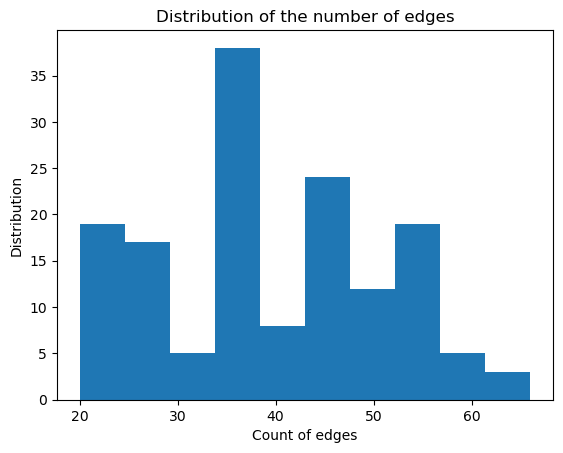

In [15]:
# plotting the distribution of the edge_nums and node_nums
plt.hist(edge_nums)
plt.title('Distribution of the number of edges')
plt.xlabel('Count of edges')
plt.ylabel('Distribution')
plt.show()

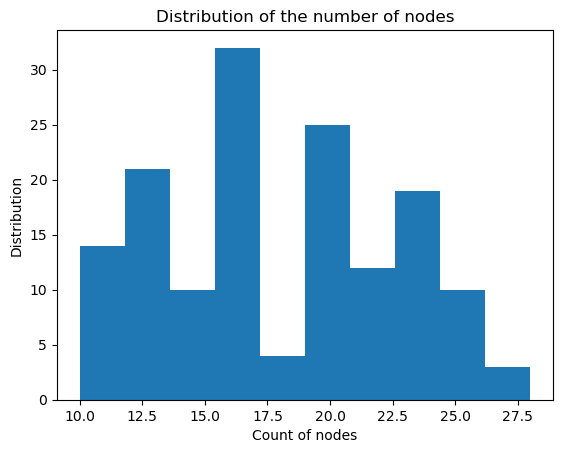

In [17]:
# plotting the distribution of the edge_nums and node_nums
plt.hist(node_nums)
plt.title('Distribution of the number of nodes')
plt.xlabel('Count of nodes')
plt.ylabel('Distribution')
plt.show()

Count of 0: 51
Count of 1: 99
Ratio between 1 and 0: 1.94


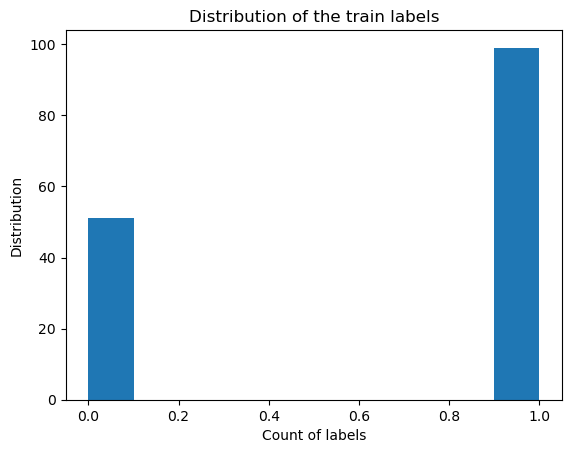

In [33]:
# distribution of labels:
print(f'Count of 0: {labels.count(0)}\n'
      f'Count of 1: {labels.count(1)}\n'
      f'Ratio between 1 and 0: {labels.count(1)/labels.count(0):.2f}')
plt.hist(labels)
plt.title('Distribution of the train labels')
plt.xlabel('Count of labels')
plt.ylabel('Distribution')
plt.show()

In [31]:
# finding the distribution of labels in the validation and test sets
val_labels = []
for i in range(len(val_data)):
    current_graph = val_data.get(i)
    val_labels.append(current_graph.y[0].item())

Count of 0: 5
Count of 1: 14
Ratio between 1 and 0: 2.80


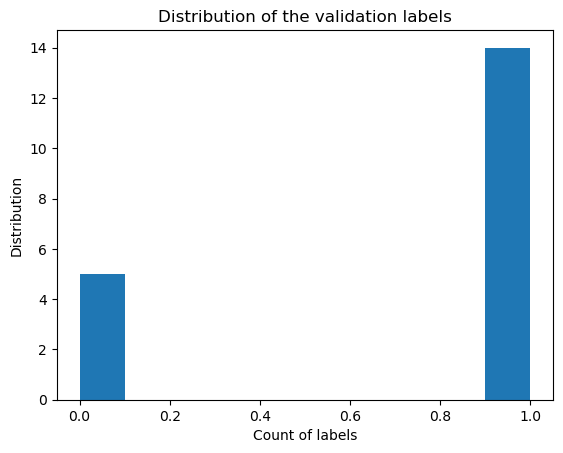

In [34]:
# distribution of labels:
print(f'Count of 0: {val_labels.count(0)}\n'
      f'Count of 1: {val_labels.count(1)}\n'
      f'Ratio between 1 and 0: {val_labels.count(1)/val_labels.count(0):.2f}')
plt.hist(val_labels)
plt.title('Distribution of the validation labels')
plt.xlabel('Count of labels')
plt.ylabel('Distribution')
plt.show()